# Case Study : How Does a Bike-Share Navigate Speedy Success?

### Background
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members.

### Scenario
I am assuming to be a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, my team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, my team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve our recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Stakeholders
This report also seeks to identify the important stakeholders that are involved in the overall analysis. This includes:

- cyclistic users,
- director of marketing,
- Cyclistic marketing team
- Cyclistic executive team

### Data Source
I will analyze Cyclistic's historical trip data from Jan 2022 to Dec 2022, available at https://divvy-tripdata.s3.amazonaws.com/index.html, provided by Motivate International Inc. for public use.

We'll explore customer usage trends, but won't access personally identifiable information due to data-privacy restrictions. Thus, we can't link pass purchases to credit card details or determine casual riders' location or pass history.

# 1. Ask 

### Business Task
To maximize the number of annual memberships by converting casual riders to annual members.

#### Analysis Questions
Three questions will guide the future marketing program:
- How do annual members and casual riders use Cyclistic bikes differently?
- Why would casual riders buy Cyclistic annual memberships?
- How can Cyclistic use digital media to influence casual riders to become members?
##### Moreno has assigned me the first question to answer: How do annual members and casual riders use Cyclistic bikes differently?

# 2. Prepare

### Data Organization
There are 12 files with naming convention of YYYYMM-divvy-tripdata and each file includes information for one month,such as the
- ride id >>>>  [ ride_id ]
- bike type >>>>  [ rideable_type ] 
- start time >>>>  [ started_at ]
- end time >>>>  [ ended_at ] 
- start station >>>>  [ start_station_name ] & [ start_station_id ]
- end station  >>>>  [ end_station_name ] & [ end_station_id ]
- start location >>>>  [ start_lat ] & [ start_lng ]
- end location >>>>  [ end_lat ] & [ end_lng ]
- and whether the rider is a member or not >>>>  [ member_casual ]


# 3.Process

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the files
case_file_1 = pd.read_csv("202201-divvy-tripdata.csv")
case_file_2 = pd.read_csv("202202-divvy-tripdata.csv")
case_file_3 = pd.read_csv("202203-divvy-tripdata.csv")
case_file_4 = pd.read_csv("202204-divvy-tripdata.csv")
case_file_5 = pd.read_csv("202205-divvy-tripdata.csv")
case_file_6 = pd.read_csv("202206-divvy-tripdata.csv")
case_file_7 = pd.read_csv("202207-divvy-tripdata.csv")
case_file_8 = pd.read_csv("202208-divvy-tripdata.csv")
case_file_9 = pd.read_csv("202209-divvy-publictripdata.csv")
case_file_10 = pd.read_csv("202210-divvy-tripdata.csv")
case_file_11 = pd.read_csv("202211-divvy-tripdata.csv")
case_file_12 = pd.read_csv("202212-divvy-tripdata.csv") 

In [4]:
# Merging all the dataframes into a single dataframe.

all_dfs = [case_file_1, case_file_2, case_file_3, case_file_4, case_file_5, case_file_6, case_file_7, case_file_8, case_file_9, case_file_10, case_file_11, case_file_12]
case_file = pd.concat(all_dfs)
df = case_file

In [5]:
# Reading the merged file

case_file_5000 = df
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [6]:
# To get information about the dataframe.
case_file_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 181805
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


In [7]:
# Check the data types of all columns
case_file_5000.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [8]:
# Check for number of null values in all columns
null_counts = case_file_5000.isnull().sum()
null_counts

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    833064
start_station_id      833064
end_station_name      892742
end_station_id        892742
start_lat                  0
start_lng                  0
end_lat                 5858
end_lng                 5858
member_casual              0
dtype: int64

In [9]:
# Drop all rows with any NaN values
case_file_5000 = case_file_5000.dropna()
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member


In [10]:
# Duplicated Entries
duplicate_rows = case_file_5000[case_file_5000.duplicated()]
duplicate_rows

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual


In [11]:
# To check if there are any duplicate values in dataframe
case_file_5000.duplicated().any()

False

In [12]:
#To convert object data type of start_time and end_time columns into datetime data type
case_file_5000["started_at"] = pd.to_datetime(case_file_5000["started_at"])
case_file_5000["ended_at"] = pd.to_datetime(case_file_5000["ended_at"])

In [13]:
case_file_5000["member_casual"].value_counts()

member    2611171
casual    1758189
Name: member_casual, dtype: int64

In [14]:
case_file_5000["rideable_type"].value_counts()

classic_bike     2597426
electric_bike    1597076
docked_bike       174858
Name: rideable_type, dtype: int64

In [15]:
# Invalid Entries Count
count_invalid_entries = case_file_5000[case_file_5000["ended_at"] < case_file_5000["started_at"]].shape[0]
count_invalid_entries

69

In [16]:
# Drop the rows with invalid entries
case_file_5000 = case_file_5000[case_file_5000["ended_at"] >= case_file_5000["started_at"]]

In [17]:
#Adding new column - ride_length (ended_at - started_at) to calculate the time travelled
case_file_5000["ride_length"] = case_file_5000["ended_at"] - case_file_5000["started_at"]
case_file_5000["ride_length"]

0        0 days 00:02:57
1        0 days 00:04:21
2        0 days 00:04:21
3        0 days 00:14:56
4        0 days 00:06:02
               ...      
181801   0 days 00:03:44
181802   0 days 00:12:59
181803   0 days 00:04:33
181804   0 days 00:03:56
181805   0 days 00:08:03
Name: ride_length, Length: 4369291, dtype: timedelta64[ns]

In [18]:
# Filter rides with duration longer than a day (24 hours)
rides_longer_than_a_day = case_file_5000[case_file_5000["ride_length"] > pd.Timedelta(days=1)]
rides_longer_than_a_day

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
11425,75B575F78EC8BA7A,docked_bike,2022-01-10 16:20:31,2022-01-12 09:38:15,Shedd Aquarium,15544,Shedd Aquarium,15544,41.867226,-87.615355,41.867226,-87.615355,casual,1 days 17:17:44
23195,0D6132D4CB1124C5,docked_bike,2022-01-12 15:58:43,2022-01-18 14:10:00,Sedgwick St & Schiller St,TA1307000143,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.907626,-87.638566,41.889955,-87.680651,casual,5 days 22:11:17
23249,5EE2D7C533CCC17B,docked_bike,2022-01-06 19:07:45,2022-01-25 14:30:33,Wabash Ave & Grand Ave,TA1307000117,Base - 2132 W Hubbard Warehouse,Hubbard Bike-checking (LBS-WH-TEST),41.891466,-87.626761,41.889955,-87.680651,casual,18 days 19:22:48
24895,12AD5F830A6BCA1F,docked_bike,2022-01-01 13:41:03,2022-01-02 14:05:22,Dusable Harbor,KA1503000064,Field Blvd & South Water St,15534,41.886976,-87.612813,41.886349,-87.617517,casual,1 days 00:24:19
25500,49B1D6A3339EECA9,docked_bike,2022-01-14 08:44:38,2022-01-16 19:27:45,Stony Island Ave & 90th St,20236,Stony Island Ave & 90th St,20236,41.731395,-87.585744,41.731395,-87.585744,casual,2 days 10:43:07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210117,94E63BBCA5AD595D,classic_bike,2022-11-20 13:20:16,2022-11-21 14:06:14,May St & Taylor St,13160,Morgan St & Polk St,TA1307000130,41.869482,-87.655486,41.871737,-87.651030,casual,1 days 00:45:58
222785,C8C0C515D707DD16,classic_bike,2022-11-08 15:12:04,2022-11-09 15:25:28,Kedzie Ave & Palmer Ct,13292,Avers Ave & Belmont Ave,15640,41.921525,-87.707322,41.939408,-87.723574,casual,1 days 00:13:24
244000,3E57EFFBC063D25C,classic_bike,2022-11-14 11:51:57,2022-11-15 12:07:50,Green St & Randolph St*,chargingstx3,Green St & Madison Ave*,chargingstx07,41.883602,-87.648627,41.881827,-87.648832,member,1 days 00:15:53
245112,601CBB74E4A7DAB1,docked_bike,2022-11-27 15:36:57,2022-11-28 16:01:51,Clark St & Ida B Wells Dr,TA1305000009,Aberdeen St & Jackson Blvd,13157,41.875933,-87.630585,41.877726,-87.654787,casual,1 days 00:24:54


In [19]:
# Filter rides with duration longer than a day (24 hours) and keep the rest
case_file_5000 = case_file_5000[case_file_5000["ride_length"] <= pd.Timedelta(days=1)]
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:44
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,0 days 00:12:59
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,0 days 00:04:33
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:56


In [20]:
# Filter rides with duration less than a minute
rides_less_than_a_minute = case_file_5000[case_file_5000["ride_length"] < pd.Timedelta(minutes=1)]
rides_less_than_a_minute

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
15,7DD70C4AA0F3EA7B,classic_bike,2022-01-14 05:47:07,2022-01-14 05:47:39,Lincoln Park Conservatory,LP-,Lincoln Park Conservatory,LP-,41.923931,-87.635825,41.923931,-87.635825,member,0 days 00:00:32
73,64CA42FCA02E5148,classic_bike,2022-01-12 14:37:54,2022-01-12 14:38:07,State St & Pearson St,TA1307000061,State St & Pearson St,TA1307000061,41.897448,-87.628722,41.897448,-87.628722,member,0 days 00:00:13
123,22096565E8AF075C,classic_bike,2022-01-14 16:10:37,2022-01-14 16:10:45,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.885637,-87.641823,41.885637,-87.641823,member,0 days 00:00:08
158,DB3BD626BB3253C9,classic_bike,2022-01-02 07:27:56,2022-01-02 07:28:00,Lincoln Ave & Waveland Ave,13253,Lincoln Ave & Waveland Ave,13253,41.948797,-87.675278,41.948797,-87.675278,member,0 days 00:00:04
203,B0F160012485900B,classic_bike,2022-01-10 07:28:27,2022-01-10 07:28:28,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.875024,-87.633094,41.875024,-87.633094,member,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181432,0257860C84414B31,classic_bike,2022-12-17 16:26:23,2022-12-17 16:26:39,Green St & Madison Ave*,chargingstx07,Green St & Madison St,TA1307000120,41.881827,-87.648832,41.881859,-87.649264,member,0 days 00:00:16
181433,FC990EB404A0B1E5,classic_bike,2022-12-17 16:25:21,2022-12-17 16:25:40,Green St & Madison Ave*,chargingstx07,Green St & Madison St,TA1307000120,41.881827,-87.648832,41.881859,-87.649264,member,0 days 00:00:19
181434,1CC1BF4DB8058739,classic_bike,2022-12-17 16:27:45,2022-12-17 16:27:48,Green St & Madison Ave*,chargingstx07,Green St & Madison St,TA1307000120,41.881827,-87.648832,41.881859,-87.649264,member,0 days 00:00:03
181435,761E8599491541F0,classic_bike,2022-12-17 16:24:06,2022-12-17 16:24:28,Green St & Madison Ave*,chargingstx07,Green St & Madison St,TA1307000120,41.881827,-87.648832,41.881859,-87.649264,member,0 days 00:00:22


In [21]:
case_file_5000 = case_file_5000[case_file_5000["ride_length"] >= pd.Timedelta(minutes=1)]
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:44
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,0 days 00:12:59
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,0 days 00:04:33
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:56


In [22]:
case_file_5000["days_of_week"] = case_file_5000["started_at"].dt.strftime("%A")
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,days_of_week
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,Thursday
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,Monday
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,Tuesday
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,Tuesday
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:44,Monday
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,0 days 00:12:59,Wednesday
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,0 days 00:04:33,Thursday
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:56,Wednesday


In [23]:
case_file_5000["month"] = case_file_5000["started_at"].dt.strftime("%B")
case_file_5000

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,days_of_week,month
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,Thursday,January
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,Monday,January
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,Tuesday,January
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,Tuesday,January
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181801,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:44,Monday,December
181802,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,0 days 00:12:59,Wednesday,December
181803,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,0 days 00:04:33,Thursday,December
181804,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:56,Wednesday,December


In [24]:
case_file_5000.dtypes

ride_id                        object
rideable_type                  object
started_at             datetime64[ns]
ended_at               datetime64[ns]
start_station_name             object
start_station_id               object
end_station_name               object
end_station_id                 object
start_lat                     float64
start_lng                     float64
end_lat                       float64
end_lng                       float64
member_casual                  object
ride_length           timedelta64[ns]
days_of_week                   object
month                          object
dtype: object

In [25]:
# To save the cleaned file for further transformation of data
case_file_5000.to_csv('cleaned.csv')

In [26]:
# To import the cleaned data file
df = pd.read_csv("cleaned.csv")

In [27]:
df = df.drop("Unnamed: 0", axis=1)

In [28]:
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,days_of_week,month
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,0 days 00:02:57,Thursday,January
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,0 days 00:04:21,Monday,January
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,0 days 00:04:21,Tuesday,January
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,0 days 00:14:56,Tuesday,January
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,0 days 00:06:02,Thursday,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4292548,43ABEE85B6E15DCA,classic_bike,2022-12-05 06:51:04,2022-12-05 06:54:48,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:44,Monday,December
4292549,F041C89A3D1F0270,electric_bike,2022-12-14 17:06:28,2022-12-14 17:19:27,Bernard St & Elston Ave,18016,Seeley Ave & Roscoe St,13144,41.949980,-87.714019,41.943403,-87.679618,member,0 days 00:12:59,Wednesday,December
4292550,A2BECB88430BE156,classic_bike,2022-12-08 16:27:47,2022-12-08 16:32:20,Wacker Dr & Washington St,KA1503000072,Green St & Madison St,TA1307000120,41.883143,-87.637242,41.881859,-87.649264,member,0 days 00:04:33,Thursday,December
4292551,37B392960E566F58,classic_bike,2022-12-28 09:37:38,2022-12-28 09:41:34,Sangamon St & Washington Blvd,13409,Peoria St & Jackson Blvd,13158,41.883165,-87.651100,41.877642,-87.649618,member,0 days 00:03:56,Wednesday,December


In [29]:
# To get information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4292553 entries, 0 to 4292552
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  ride_length         object 
 14  days_of_week        object 
 15  month               object 
dtypes: float64(4), object(12)
memory usage: 524.0+ MB


In [ ]:
#To convert object data type of start_time and end_time columns into datetime data type
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

# To convert object datatype to timedelta
df["ride_length"] = pd.to_timedelta(df["ride_length"])

# Analysis & Share

In [31]:
df.describe()

,start_lat,start_lng,end_lat,end_lng,ride_length
count,4.292553e+06,4.292553e+06,4.292553e+06,4.292553e+06,4292553
mean,4.190206e+01,-8.764477e+01,4.190232e+01,-8.764490e+01,0 days 00:17:16.183940652
std,4.250520e-02,2.567981e-02,6.843010e-02,1.146803e-01,0 days 00:30:59.377823766
min,4.164850e+01,-8.783332e+01,0.000000e+00,-8.783000e+01,0 days 00:01:00
25%,4.188106e+01,-8.765814e+01,4.188132e+01,-8.765840e+01,0 days 00:06:15
50%,4.189694e+01,-8.764180e+01,4.189766e+01,-8.764275e+01,0 days 00:10:48
75%,4.192877e+01,-8.762858e+01,4.192889e+01,-8.762858e+01,0 days 00:19:15
max,4.563503e+01,-7.379648e+01,4.206485e+01,0.000000e+00,0 days 23:59:22


In [32]:
#To calculate mean of ride length of all types of users
mean_ride_length = df["ride_length"].mean()
mean_ride_length

Timedelta('0 days 00:17:16.183940652')

In [33]:
# Calculate the max ride_length of all types of users
max_ride_length = df["ride_length"].max()
max_ride_length

Timedelta('0 days 23:59:22')

In [34]:
# To calculate mean ride length for member
mean_ride_length_member = df[df["member_casual"] == "member"]
mean_ride_length_member = mean_ride_length_member["ride_length"].mean()
mean_ride_length_member

Timedelta('0 days 00:12:40.363366311')

In [35]:
# To calculate mean ride length for casual riders
mean_ride_length_casual = df[df["member_casual"] == "casual"]
mean_ride_length_casual = mean_ride_length_casual["ride_length"].mean()
mean_ride_length_casual

Timedelta('0 days 00:24:04.310330306')

In [36]:
# To calculate max ride length for member
max_ride_length_member = df[df["member_casual"] == "member"]
max_ride_length_member = max_ride_length_member["ride_length"].max()
max_ride_length_member

Timedelta('0 days 23:56:20')

In [37]:
# To calculate max ride length for casual riders
max_ride_length_casual = df[df["member_casual"] == "casual"]
max_ride_length_casual = max_ride_length_casual["ride_length"].max()
max_ride_length_casual

Timedelta('0 days 23:59:22')

In [38]:
# Calculate the mode of week_day for all types of users
mode_week_day = df["days_of_week"].mode()
mode_week_day

0    Saturday
Name: days_of_week, dtype: object

In [39]:
# Calculate the mode of week_day for all types of users
mode_week_day = df["month"].mode()
mode_week_day

0    July
Name: month, dtype: object

In [40]:
# To calculate mode of week_day for member
mode_week_day_member = df[df["member_casual"] == "member"]
mode_week_day_member = mode_week_day_member["days_of_week"].mode()
mode_week_day_member

0    Thursday
Name: days_of_week, dtype: object

In [41]:
# To calculate mode of week_day for member
mode_week_day_member = df[df["member_casual"] == "casual"]
mode_week_day_member = mode_week_day_member["days_of_week"].mode()
mode_week_day_member

0    Saturday
Name: days_of_week, dtype: object

In [42]:
# Bikes types used by riders
bikes_types = df.groupby(['member_casual', 'rideable_type']).size().reset_index(name='total_trips')
bikes_types = bikes_types.sort_values(['member_casual', 'total_trips'], ascending=[True, False])

In [43]:
bikes_types

,member_casual,rideable_type,total_trips
0,casual,classic_bike,875973
2,casual,electric_bike,681877
1,casual,docked_bike,173241
3,member,classic_bike,1682877
4,member,electric_bike,878585


<AxesSubplot:xlabel='rideable_type', ylabel='total_trips'>

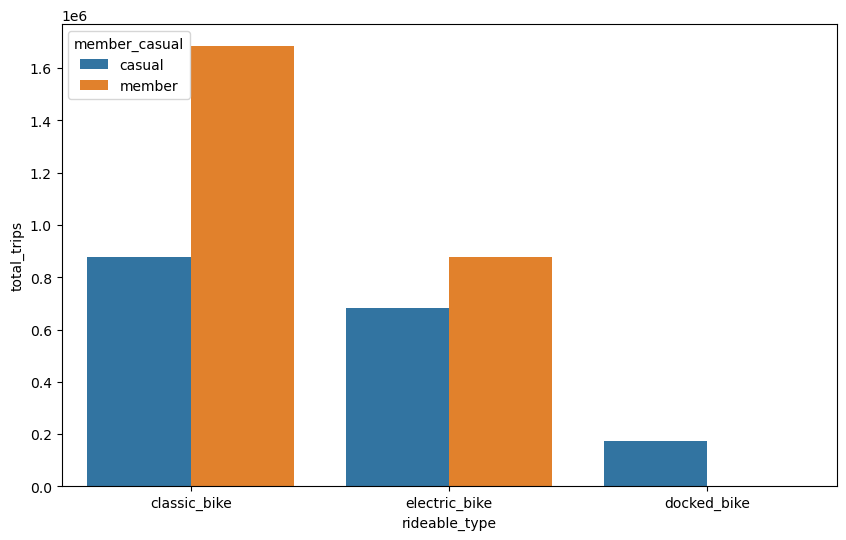

In [44]:
# Create a bar chart of the number of trips by user type and rideable type
plt.figure(figsize=(10, 6))
sns.barplot(
    x='rideable_type',
    y='total_trips',
    hue='member_casual',
    data=bikes_types
)

In [45]:
# Bikes types used by riders
bikes_types1 = df.groupby(['rideable_type']).size().reset_index(name='total_trips')
bikes_types1 = bikes_types1.sort_values(['total_trips'], ascending=[True])
bikes_types1

,rideable_type,total_trips
1,docked_bike,173241
2,electric_bike,1560462
0,classic_bike,2558850


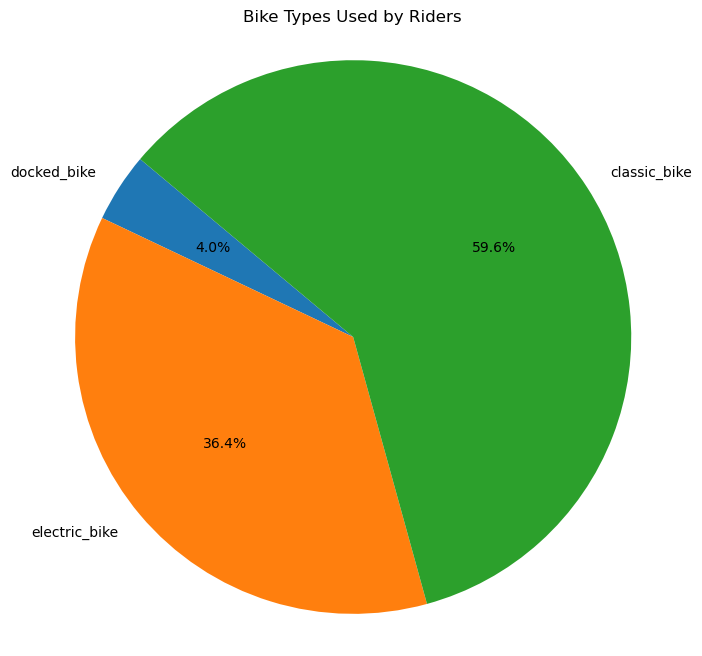

In [46]:
# Assuming you have already calculated the bikes_types1 DataFrame
plt.figure(figsize=(8, 8))
plt.pie(bikes_types1['total_trips'], labels=bikes_types1['rideable_type'], autopct='%1.1f%%', startangle=140)
plt.title('Bike Types Used by Riders')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

In [47]:
# No. of trips per month
trips_per_month1 = df.groupby(['month']).size().reset_index(name='total_trips')
trips_per_month1 = trips_per_month1.sort_values(['total_trips'])
trips_per_month1

,month,total_trips
4,January,79039
3,February,87642
2,December,132612
7,March,212872
9,November,251124
0,April,268525
10,October,406319
8,May,494083
11,September,525322
1,August,594318


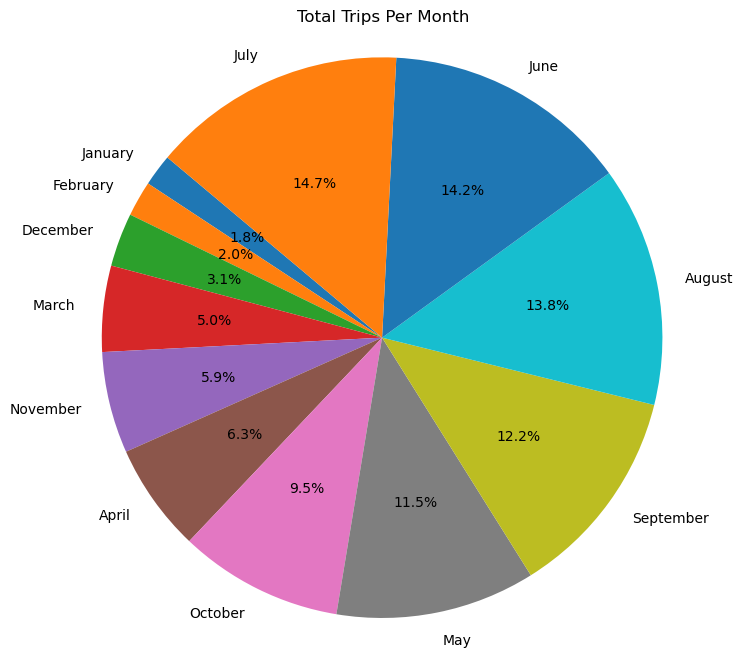

In [48]:
# Assuming you have already calculated the trips_per_month1 DataFrame
plt.figure(figsize=(8, 8))
plt.pie(trips_per_month1['total_trips'], labels=trips_per_month1['month'], autopct='%1.1f%%', startangle=140)
plt.title('Total Trips Per Month')
plt.axis('equal')  
plt.show()

In [49]:
# No. of trips per month
trips_per_month = df.groupby(['month', 'member_casual']).size().reset_index(name='total_trips')
trips_per_month = trips_per_month.sort_values(['member_casual'])
trips_per_month

,month,member_casual,total_trips
0,April,casual,90806
2,August,casual,265742
20,October,casual,148861
4,December,casual,30978
6,February,casual,14960
18,November,casual,72361
8,January,casual,12464
10,July,casual,306594
22,September,casual,217480
12,June,casual,287543


In [50]:
# To check the number of users over years
trips_per_month2 = df.groupby('month')['member_casual'].value_counts()
trips_per_month2

month      member_casual
April      member           177719
           casual            90806
August     member           328576
           casual           265742
December   member           101634
           casual            30978
February   member            72682
           casual            14960
January    member            66575
           casual            12464
July       member           324304
           casual           306594
June       member           322256
           casual           287543
March      member           146494
           casual            66378
May        member           277159
           casual           216924
November   member           178763
           casual            72361
October    member           257458
           casual           148861
September  member           307842
           casual           217480
Name: member_casual, dtype: int64

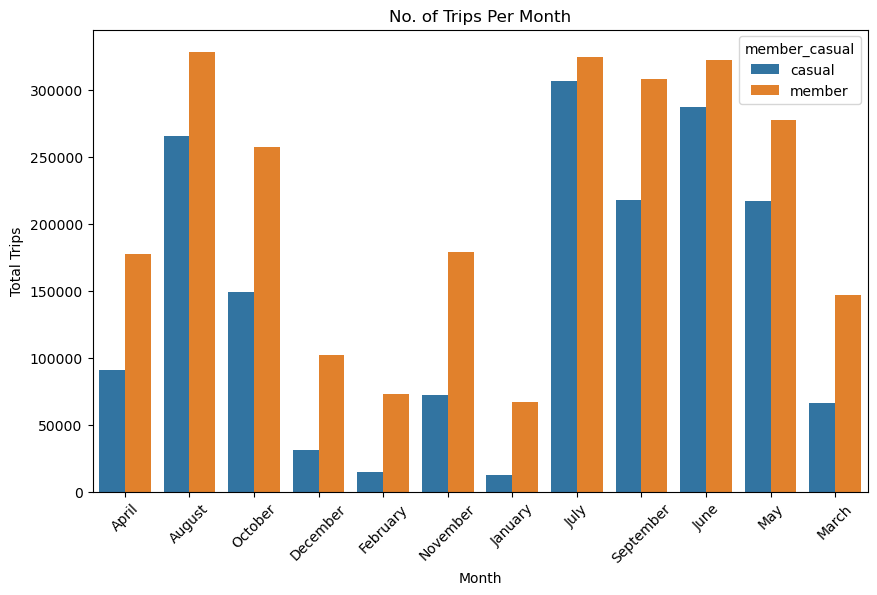

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='total_trips', hue='member_casual', data=trips_per_month)
plt.title("No. of Trips Per Month")
plt.xlabel("Month")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.show()

In [52]:
# No. of trips per day of the week
trips_per_day_of_week = df.groupby(['days_of_week', 'member_casual']).size().reset_index(name='total_trips')
trips_per_day_of_week = trips_per_day_of_week.sort_values(['member_casual'])
trips_per_day_of_week

,days_of_week,member_casual,total_trips
0,Friday,casual,244964
2,Monday,casual,207517
4,Saturday,casual,361583
6,Sunday,casual,296567
8,Thursday,casual,226552
10,Tuesday,casual,193403
12,Wednesday,casual,200505
1,Friday,member,353085
3,Monday,member,368249
5,Saturday,member,331314


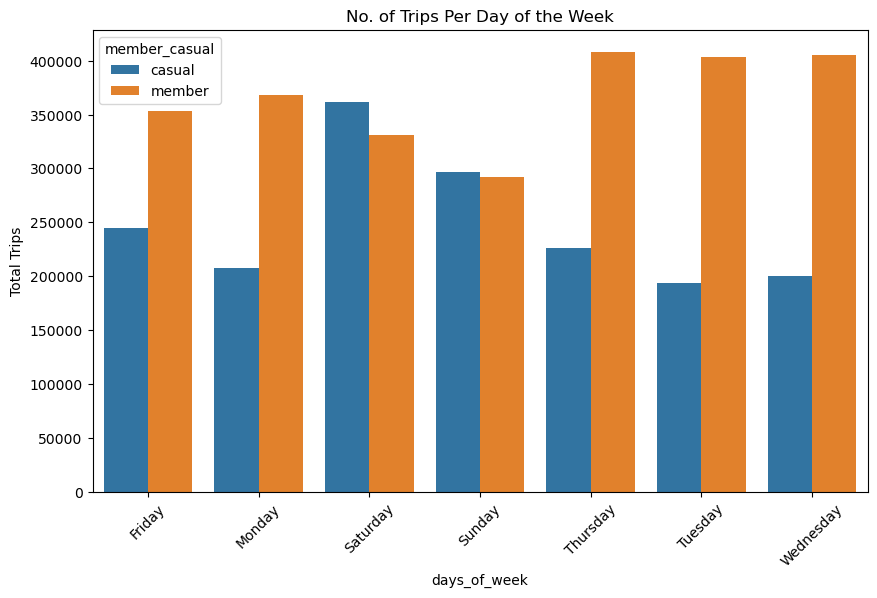

In [53]:
# No. of Trips Per Day of the Week (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x='days_of_week', y='total_trips', hue='member_casual', data=trips_per_day_of_week)
plt.title("No. of Trips Per Day of the Week")
plt.xlabel("days_of_week")
plt.ylabel("Total Trips")
plt.xticks(rotation=45)
plt.show()

In [54]:
# No. of trips per day of the week
trips_per_day_of_week1 = df.groupby(['days_of_week']).size().reset_index(name='total_trips')
trips_per_day_of_week1 = trips_per_day_of_week1.sort_values(['total_trips'])
trips_per_day_of_week1

,days_of_week,total_trips
1,Monday,575766
3,Sunday,588201
5,Tuesday,597246
0,Friday,598049
6,Wednesday,605650
4,Thursday,634744
2,Saturday,692897


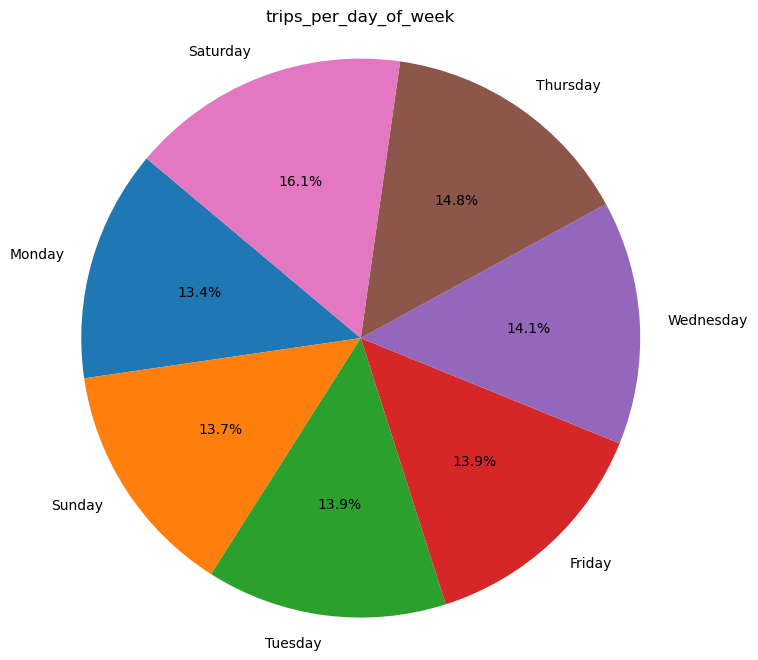

In [55]:
# Assuming you have already calculated the trips_per_month1 DataFrame
plt.figure(figsize=(8, 8))
plt.pie(trips_per_day_of_week1['total_trips'], labels=trips_per_day_of_week1['days_of_week'], autopct='%1.1f%%', startangle=140)
plt.title('trips_per_day_of_week')
plt.axis('equal')
plt.show()

In [56]:
# To check the number of users in each type over past 12 months
member_type = df["member_casual"].value_counts()
member_type

member    2561462
casual    1731091
Name: member_casual, dtype: int64

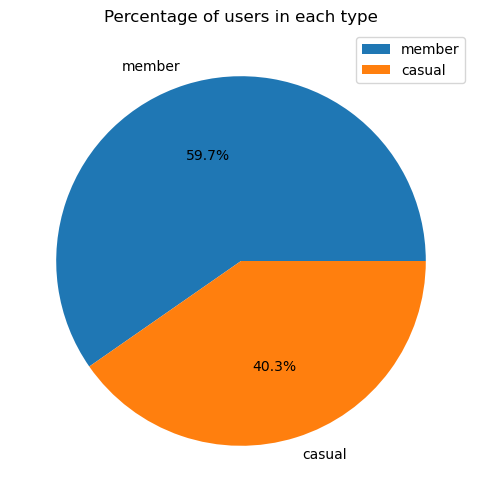

In [57]:
# To plot the pie chart of users in each type
plt.figure(figsize = (8,6))
plt.pie(member_type.values, labels = member_type.index, autopct='%1.1f%%')
plt.title("Percentage of users in each type")
plt.legend(member_type.index)
plt.show()

In [58]:
# To segregate the number of users into member or casual riders over the months
list_month = []
list_x = []
list_y = list(trips_per_month2.values)
for i, j in trips_per_month2.index:
  list_x.append(j)
  list_month.append(str(i))

Text(0.5, 1.0, 'Count of Member and Casual Riders over the months')

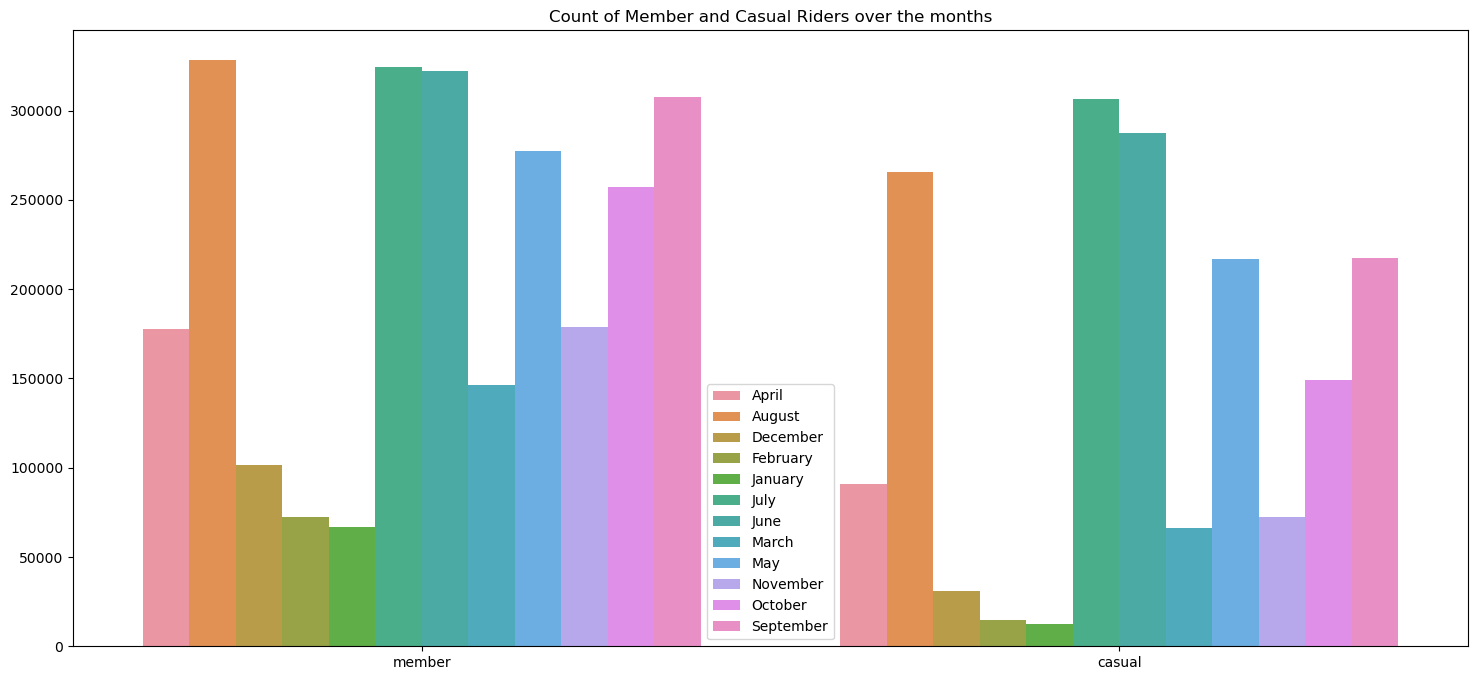

In [59]:
# Plot count of Member and Casual Riders over the months
plt.figure(figsize = (18,8))
sns.barplot(list_x, list_y, hue = list_month)
plt.title("Count of Member and Casual Riders over the months")

# ACT

After identifying the differences between casual and member riders, marketing strategies to target casual riders can be developed to persuade them to become members.
Recommendations:

- Marketing campaigns might be conducted in spring and summer at tourist/recreational locations popular among casual riders.
- Casual riders are most active on weekends and during the summer and spring, thus they may be offered seasonal or weekend-only memberships.
- Casual riders use their bikes for longer durations than members. Offering discounts for longer rides may incentivize casual riders and entice members to ride for longer periods of time.
- We have observed that approximately more than half of the casual members use classic_bike for travelling, so we can offer special incentives in order to increase conversion from casual to annual.